# UC San Diego: Neural Data Science
## Final Project Title (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Sukhman Virk
- Yash Sharma
- Lucas Fasting
- Shrieyaa Sekar Jayanthi


# Overview

* Write a clear, 3-4 sentence summary of what you did and why.

<a id='research_question'></a>
# Research Question

How do the gene expression patterns correlate with the electrophysical properties of neurons across the different brain structures of humans and mice?

<a id='background'></a>

## Background & Prior Work

* In 2-3 paragraphs, describe the motivation behind your question. What’s the big picture, and why is it interesting? Are there published papers addressing aspects of your question? You should cite at least three primary references here. You are welcome to replicate published papers using publicly available data, just cite them and explain why!

    <p>Studying the connection between gene expression patterns and the electrophysiological properties of neurons is extremely important for understanding how brain functions emerge at the cellular level and the impact they have on the molecular level. Different brain regions involved in cognition, sensory processing, and motor control, exhibit specific characteristics that are influenced by their gene expression profiles and their electrophysiological properties. As a group, we are very interested in the inferences that can be made between human brain function and neural activity in mice. We find this interesting because these similarities can help scientists confirm whether discoveries made in mouse physiology can also be applied to humans.
    <p>Scientists, using machine learning techniques, have been able to capture large amounts of data and visualize complex information. Using modern technology we now have the power to carry out computationally heavy tasks that were previously not possible. When this data is displayed we can identify patterns and differences within the data that were previously impossible. 
    <p>Several key studies have highlighted aspects of this complex relationship. Gouwens et al. (2020) correlated the transcriptomic and electrophysiological diversity in mouse visual cortical neurons, identifying unique neuronal types with distinct molecular and functional profiles. This study expands our knowledge of the molecular foundations of neuronal diversity, offering insights that could lead to a deeper understanding of how complex neural networks work.
    <p>Clancy et al. (2009) contributes to our understanding of cross-species correlations with a focus on the cortical GABAergic and subplate neural populations in mice, rats, and macaque species. The authors observed that these particular neurons have many different shapes and structures, which sets them apart from the more common type of neurons called pyramidal neurons, which is closely related to some of the findings from Gouwens et al. (2020).
    <p>Földy et al. (2016) demonstrated how specific gene expression patterns correspond to electrophysiological behaviors in human cortical neurons, assisting in our understanding of how the human brain functions. These studies, supported by resources like the Allen Brain Atlas, have created an in-depth view of how genetic and electrophysiological properties can be visualized with large-scale data. The Allen Brain Atlas has made it possible to make inferences about many kinds of data observed by the firing of action potentials. This gives us the chance to observe the behavior of neurons, helping doctors catch and diagnose neurological disorders before they worsen.


References (include links):
- 1) https://pubmed.ncbi.nlm.nih.gov/33186530/
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2779099/
- 3) https://pubmed.ncbi.nlm.nih.gov/27531958/
- 4) https://portal.brain-map.org/?utm_source=google&utm_medium=cpc&utm_campaign=brand_brainmaporg&gad_source=1&gclid=Cj0KCQjw_-GxBhC1ARIsADGgDjtsd3F3KRm0a_lF7V1HnmiDBTRpFChm8CFby2PwiNrXDjFz0NzB1fYaAlWDEALw_wcB
        

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Data Wrangling

* Explain steps taken to pull the data you need into Python.

In [16]:
## YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr


In [17]:
data  = pd.read_csv('cell_types_specimen_details.csv').set_index('specimen__id')
print(data.shape)
data.columns

(2333, 53)


Index(['line_name', 'specimen__name', 'specimen__hemisphere', 'structure__id',
       'structure__name', 'structure__acronym', 'structure_parent__id',
       'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'nr__reconstruction_type',
       'nrwkf__id', 'erwkf__id', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'si__path', 'csl__x', 'csl__y',
       'csl__z', 'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendrite_type', 'morph_thumb_path',
       'ephys_thumb_path', 'ep

# Data Cleaning

* Describe your data cleaning steps here.

In [18]:
## YOUR CODE HERE
relevant_cols = [ 'structure__name', 'donor__species', 'ef__avg_firing_rate', 'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square', 'ef__avg_firing_rate', 'ephys_thumb_path', 'ephys_inst_thresh_thumb_path']

In [19]:
data_filtered = data[relevant_cols]
data_clean = data_filtered.dropna()
print(data_clean.shape)
data_clean.head()

(2176, 8)


,structure__name,donor__species,ef__avg_firing_rate,ef__vrest,ef__upstroke_downstroke_ratio_long_square,ef__avg_firing_rate,ephys_thumb_path,ephys_inst_thresh_thumb_path
specimen__id,,,,,,,,
525011903,"""frontal lobe""",Homo Sapiens,13.572511,-70.561035,2.895461,13.572511,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142
469801138,"""Primary visual area, layer 4""",Mus musculus,79.952029,-72.042976,1.162618,79.952029,/api/v2/well_known_file_download/487618917,/api/v2/well_known_file_download/491380580
528642047,"""middle temporal gyrus""",Homo Sapiens,77.445126,-69.209610,1.891881,77.445126,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975
605889373,"""Primary visual area, layer 2/3""",Mus musculus,12.666099,-72.712036,3.379321,12.666099,/api/v2/well_known_file_download/657612184,/api/v2/well_known_file_download/657612186
537256313,"""middle temporal gyrus""",Homo Sapiens,12.919897,-72.628105,3.121182,12.919897,/api/v2/well_known_file_download/542174764,/api/v2/well_known_file_download/542174766


# Data Visualization

* This is a good place for some relevant visualizations related to any exploratory data anlayses (EDA) you did after the basic cleaning.

In [20]:
human_df = data_clean[data_clean['donor__species'] == 'Homo Sapiens']
mouse_df = data_clean[data_clean['donor__species'] == 'Mus musculus']
print(human_df.shape, mouse_df.shape)

(357, 8) (1819, 8)


In [21]:
numeric_cols = human_df.select_dtypes(include=['number']).columns
human_df_numeric = human_df[numeric_cols]

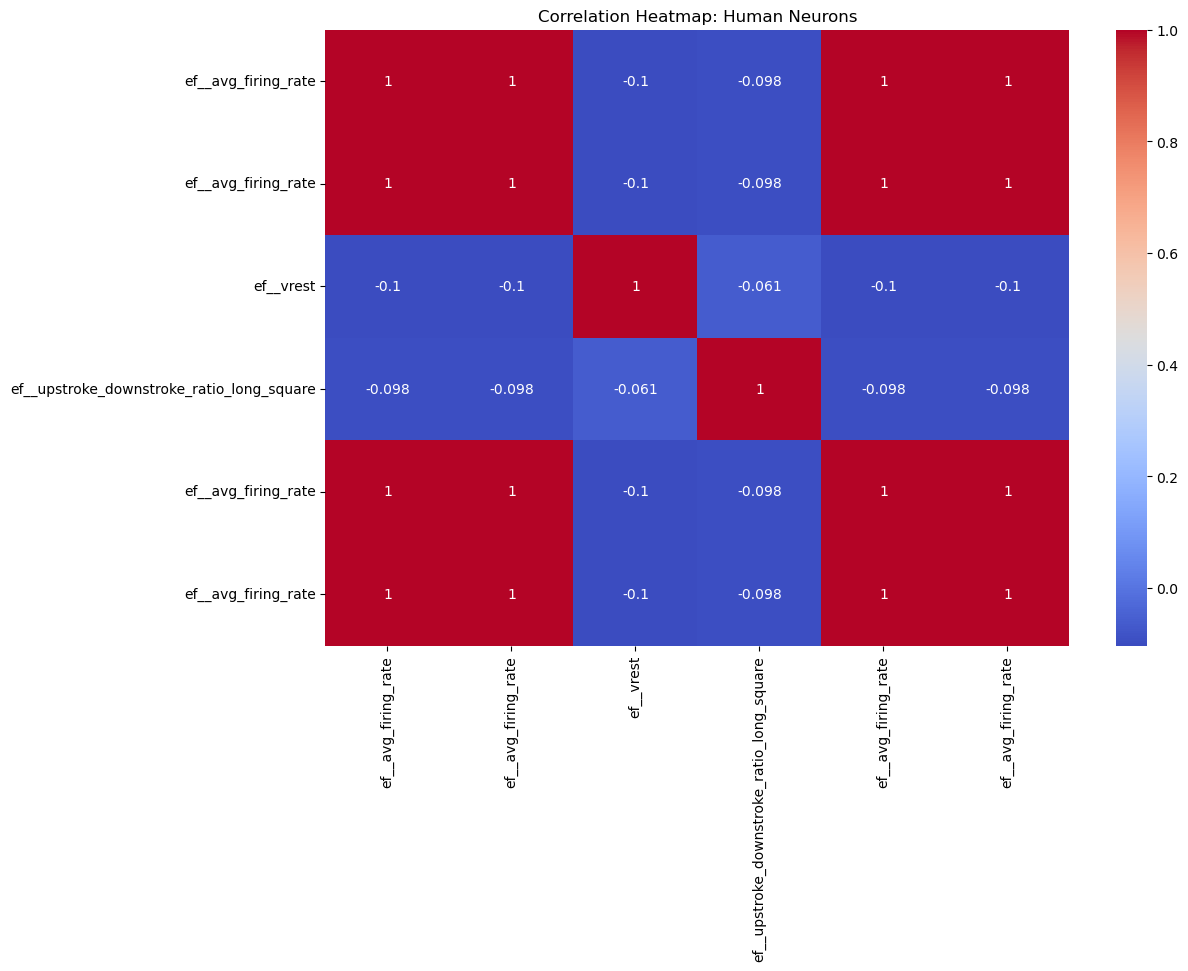

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(human_df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Human Neurons")
plt.show()

In [23]:
numeric_cols_mouse = mouse_df.select_dtypes(include=['number']).columns
mouse_df_numeric = mouse_df[numeric_cols_mouse]

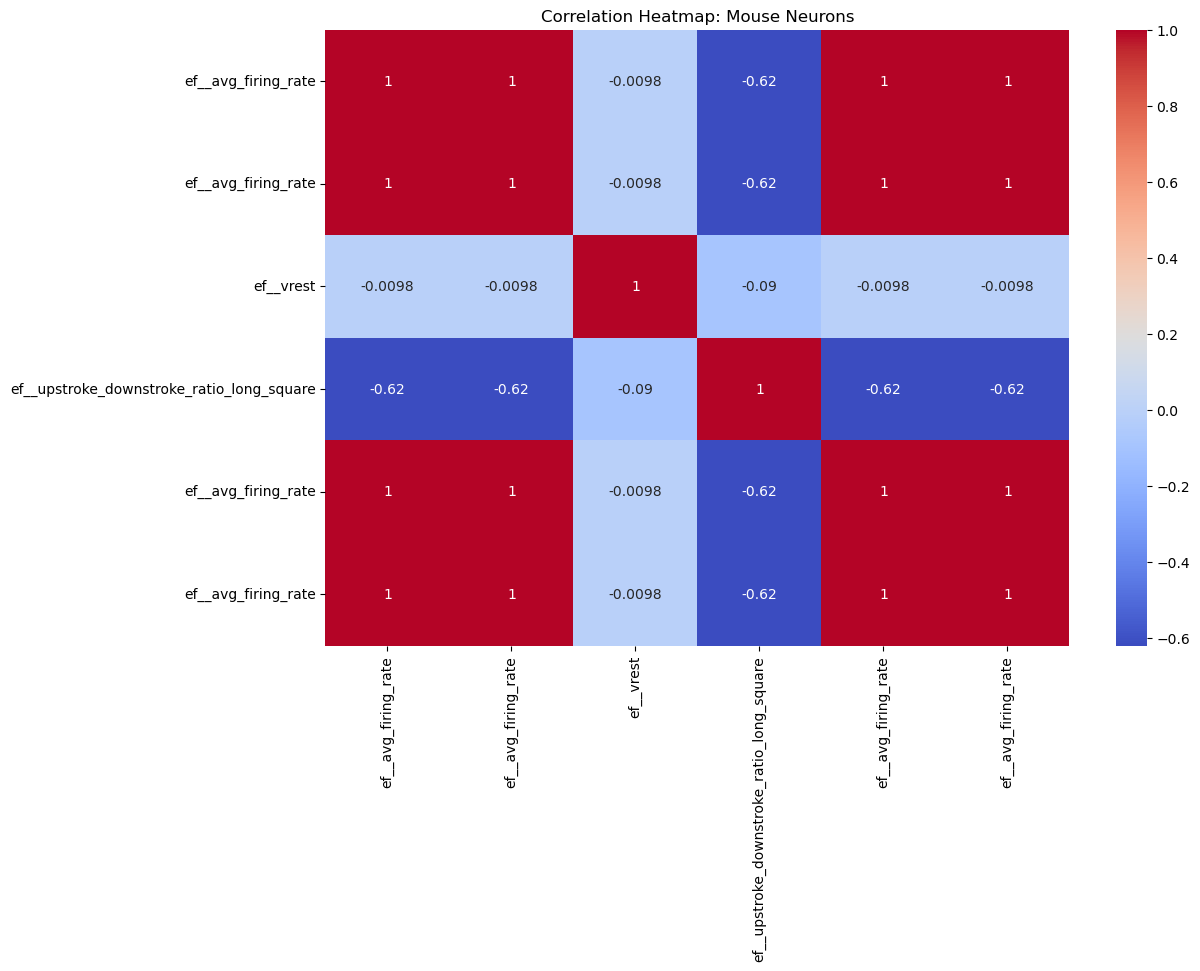

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(mouse_df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Mouse Neurons")
plt.show()

We use PCA to reduce the dimensionality of the gene expression data, allowing us to visualize and identify patterns or clusters that may be indicative of underlying biological processes or relationships.

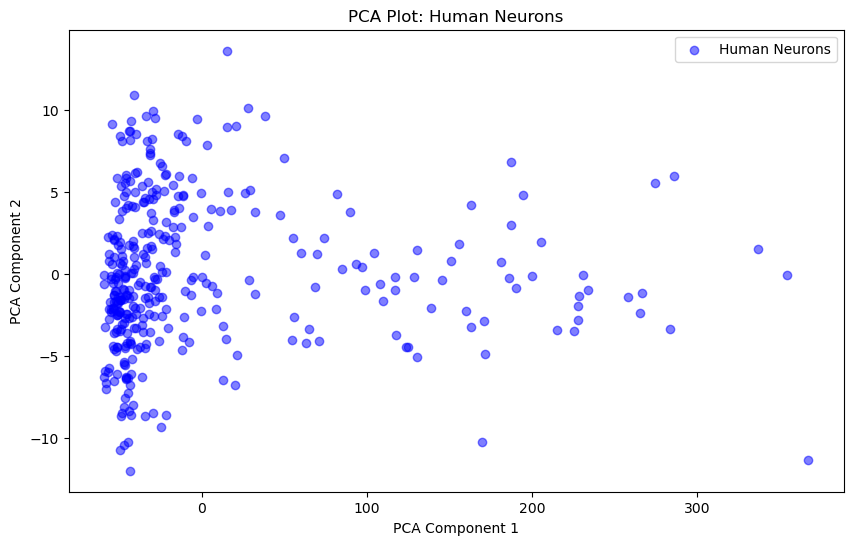

In [27]:
pca_human = PCA(n_components=2)
human_pca_result = pca_human.fit_transform(human_df[[col for col in human_df.columns if 'ef' in col]])

plt.figure(figsize=(10, 6))
plt.scatter(human_pca_result[:, 0], human_pca_result[:, 1], c='blue', alpha=0.5, label='Human Neurons')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot: Human Neurons')
plt.legend()
plt.show()

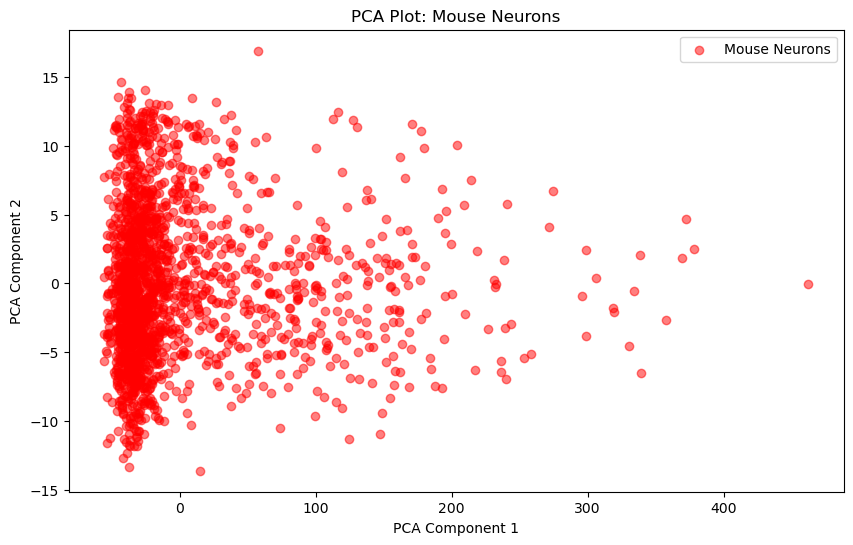

In [28]:
pca_mouse = PCA(n_components=2)
mouse_pca_result = pca_mouse.fit_transform(mouse_df[[col for col in mouse_df.columns if 'ef' in col]])

plt.figure(figsize=(10, 6))
plt.scatter(mouse_pca_result[:, 0], mouse_pca_result[:, 1], c='red', alpha=0.5, label='Mouse Neurons')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot: Mouse Neurons')
plt.legend()
plt.show()

# Cluster Dendogram

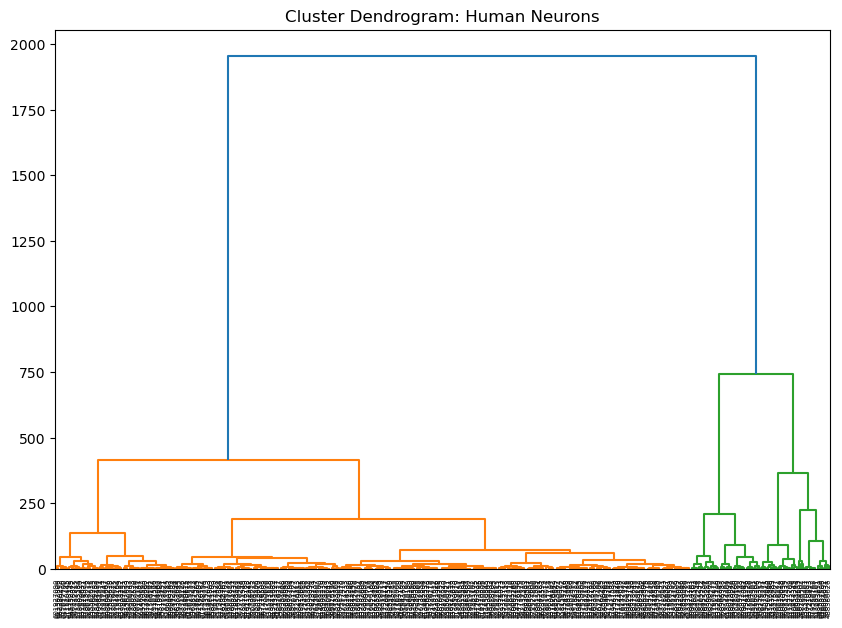

In [29]:
linked_human = linkage(human_df[[col for col in human_df.columns if 'ef' in col]], 'ward')  
plt.figure(figsize=(10, 7))
dendrogram(linked_human, labels=human_df.index.values, leaf_rotation=90)
plt.title('Cluster Dendrogram: Human Neurons')
plt.show()

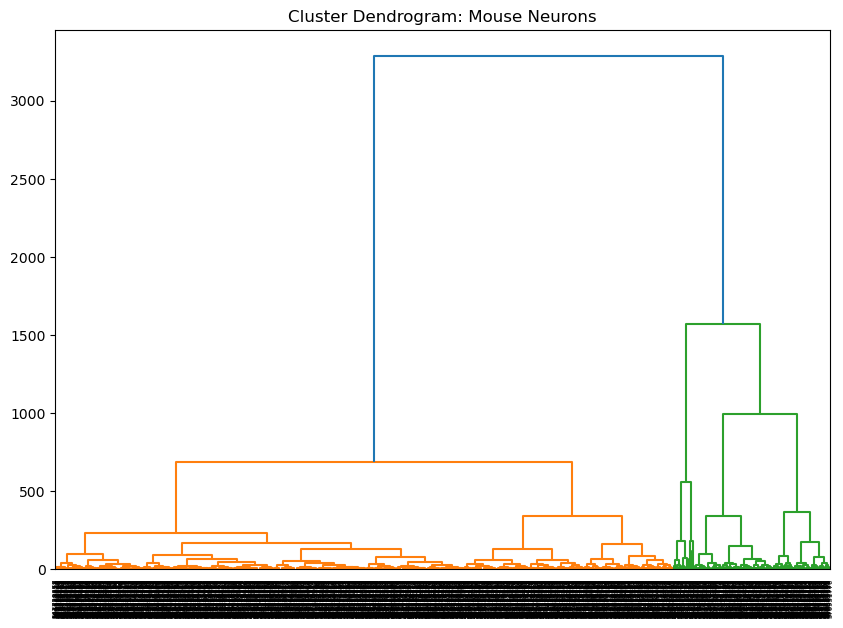

In [43]:
linked_mouse = linkage(mouse_df[[col for col in mouse_df.columns if 'ef' in col]], 'ward') 
plt.figure(figsize=(10, 7))
dendrogram(linked_mouse, labels=mouse_df.index.values, leaf_rotation=90)
plt.title('Cluster Dendrogram: Mouse Neurons')
plt.show()

# Pair Plot

In [51]:
relevant_cols = [
    'structure__name', 'donor__species', 'ef__avg_firing_rate', 
    'ef__vrest', 'ef__upstroke_downstroke_ratio_long_square', 
    'ef__avg_firing_rate', 'ephys_thumb_path', 'ephys_inst_thresh_thumb_path'
]
data_filtered = data[relevant_cols]
data_clean = data_filtered.dropna()

In [52]:
numerical_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data_clean[numerical_cols].dropna()

In [56]:
pca = PCA(n_components=5)
pca_data = pca.fit_transform(data_numerical)

In [57]:
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(5)])

/Users/yash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


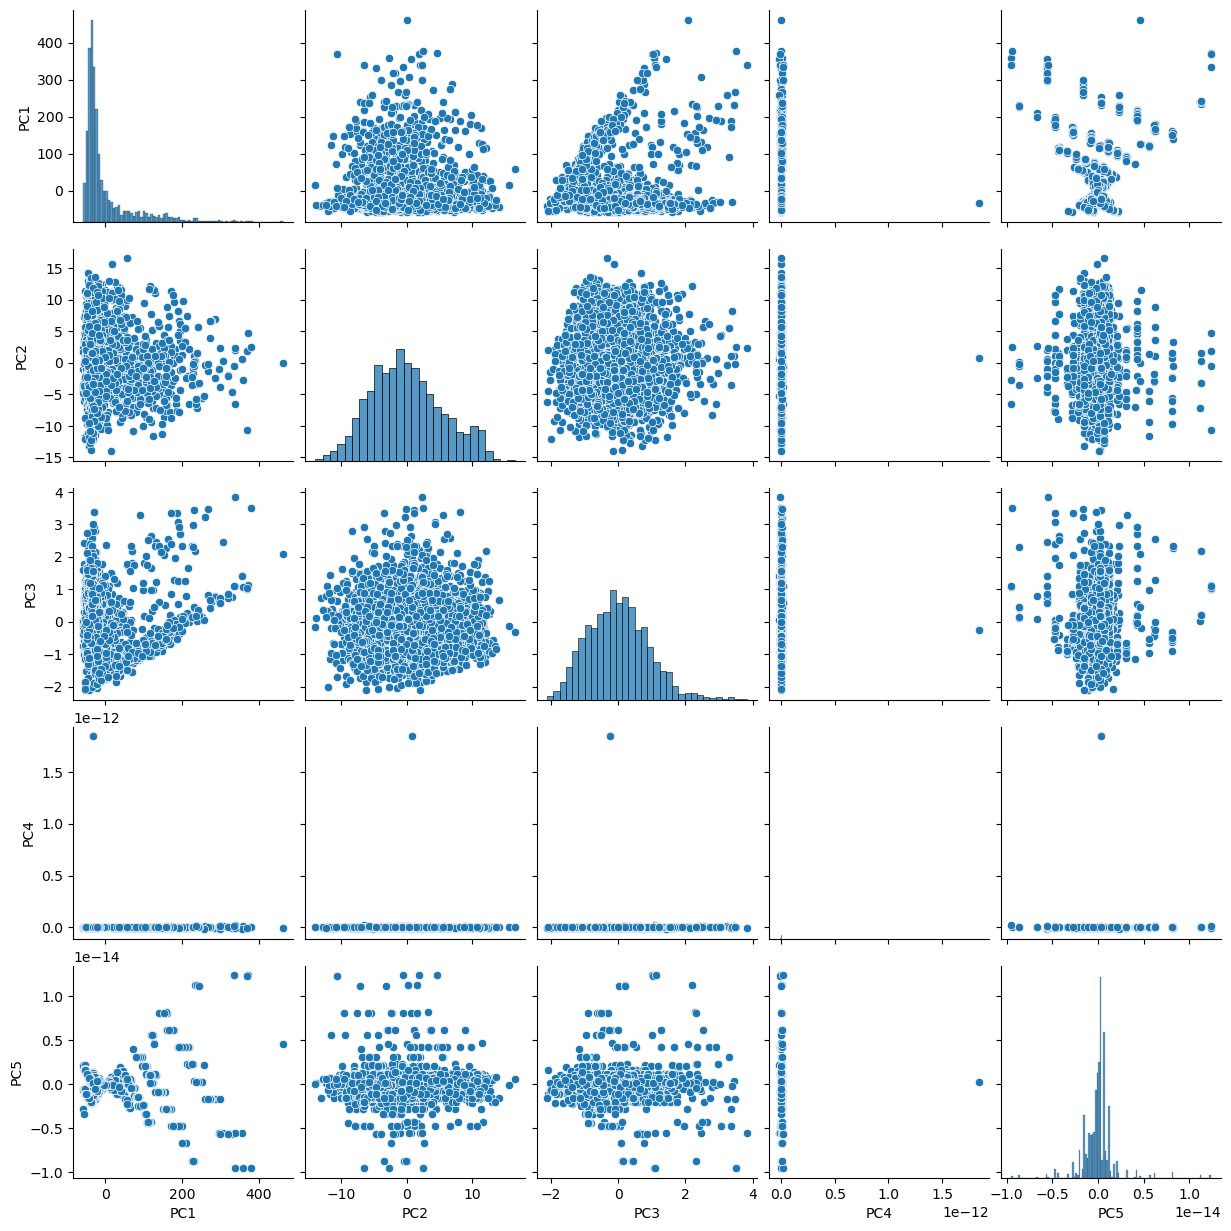

In [58]:
sns.pairplot(pca_df)
plt.show()

__PC1__

This graph highlights that the primary source of variation in the data is led by brain regions, particularly the frontal lobe and middle temporal gyrus, with high average firing rates, elevated resting membrane potentials, and specific gene expression profiles like GAD1 and GRIN2B.

__PC2__

This graph suggests that there are noticeable differences between specific types of neurons/brain regions, particularly in the primary visual area. This includes gene expressions like FOXP2 and GAD2 and electrophysiological properties like the upstroke-downstroke ratio.

__PC3__

PC3 highlights that there are further variations within specific subgroups of brain structures or neuron types. This is mainly visible in the layer-specific neurons of the primary visual area with different spike frequency adaptation rates and expressions of CALB1 and RELN.

__PC4__

PC4 indicates that the major sources of variability are already highlighted by the first three components.

__PC5__

PC5 adds that the main patterns of variation in gene expression and electrophysiological properties are highlighted by the first three components.

# Data Analysis & Results

* Include cells that describe the steps in your data analysis.
* You'll likely also have some visualizations here as well.

In [31]:
## YOUR CODE HERE


# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).
* Discussed limitations of your analyses.
* You can also discuss future directions you'd like to pursue.